
# Customer Churn Analysis – Telecommunications Company

This project analyzes customer churn data from a telecommunications company. Customers may have phone and other services, and the company aims to reduce churn—when customers stop using the services and cancel their accounts.

The dataset includes a binary target column, Churn, indicating whether a customer has churned (Yes or No). The goal of this analysis is to explore the dataset, understand the patterns behind customer churn, and prepare the data for a predictive machine learning model.

By identifying factors associated with churn, this work supports the development of strategies that customer service representatives can use to retain customers and improve overall satisfaction.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
import pandas as pd
df = pd.read_csv('churn_data.csv')

In [155]:
df = pd.read_csv('churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [59]:
print(df.head())

   customerID  tenure PhoneService        Contract              PaymentMethod  \
0  7590-VHVEG       1           No  Month-to-month           Electronic check   
1  5575-GNVDE      34          Yes        One year               Mailed check   
2  3668-QPYBK       2          Yes  Month-to-month               Mailed check   
3  7795-CFOCW      45           No        One year  Bank transfer (automatic)   
4  9237-HQITU       2          Yes  Month-to-month           Electronic check   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes  


In [154]:
df.tail()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,66,Yes,Two year,Bank transfer (automatic),105.65,6844.50,No


In [63]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7032 non-null   float64
 7   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB
None


In [156]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [157]:
df.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
import pandas as pd
df_churn_yes = df[df['Churn'] == 'Yes']
print(df_churn_yes)

            tenure PhoneService        Contract              PaymentMethod  \
customerID                                                                   
3668-QPYBK       2          Yes  Month-to-month               Mailed check   
9237-HQITU       2          Yes  Month-to-month           Electronic check   
9305-CDSKC       8          Yes  Month-to-month           Electronic check   
7892-POOKP      28          Yes  Month-to-month           Electronic check   
0280-XJGEX      49          Yes  Month-to-month  Bank transfer (automatic)   
...            ...          ...             ...                        ...   
1699-HPSBG      12          Yes        One year           Electronic check   
8775-CEBBJ       9          Yes  Month-to-month  Bank transfer (automatic)   
6894-LFHLY       1          Yes  Month-to-month           Electronic check   
0639-TSIQW      67          Yes  Month-to-month    Credit card (automatic)   
8361-LTMKD       4          Yes  Month-to-month               Ma

In [162]:
count_churn = df['Churn'].value_counts()
print(count_churn)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [184]:
df_churn_yes = df[df['Churn'] == 'Yes']
count_phone_service_yes = df_churn_yes[df_churn_yes['PhoneService'] == 'Yes'].shape[0]
print(f"Churn = 'Yes', PhoneService = 'Yes' : {count_phone_service_yes}")

Churn = 'Yes', PhoneService = 'Yes' : 1699


In [158]:
df['Churn']

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7043, dtype: object

In [150]:
churn_counts = df_churn_yes.groupby('Contract').size()
print(churn_counts)

Contract
Month-to-month    1655
One year           166
Two year            48
dtype: int64


In [153]:
payment_method_counts = df_churn_yes.groupby('PaymentMethod').size()
print(payment_method_counts)

PaymentMethod
Bank transfer (automatic)     258
Credit card (automatic)       232
Electronic check             1071
Mailed check                  308
dtype: int64


In [36]:
print(df.isnull().sum())

tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64


In [39]:
df.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
df['tenure']

customerID
7590-VHVEG     1
5575-GNVDE    34
3668-QPYBK     2
7795-CFOCW    45
9237-HQITU     2
              ..
6840-RESVB    24
2234-XADUH    72
4801-JZAZL    11
8361-LTMKD     4
3186-AJIEK    66
Name: tenure, Length: 7043, dtype: int64

In [167]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [166]:
index_max_totalcharges = df_churn_yes['TotalCharges'].idxmax()
file_max_totalcharges = df_churn_yes.loc[index_max_totalcharges]
print(file_max_totalcharges)

tenure                                   72
PhoneService                            Yes
Contract                           One year
PaymentMethod     Bank transfer (automatic)
MonthlyCharges                        117.8
TotalCharges                         8684.8
Churn                                   Yes
Name: 2889-FPWRM, dtype: object


Text(0, 0.5, 'Counts')

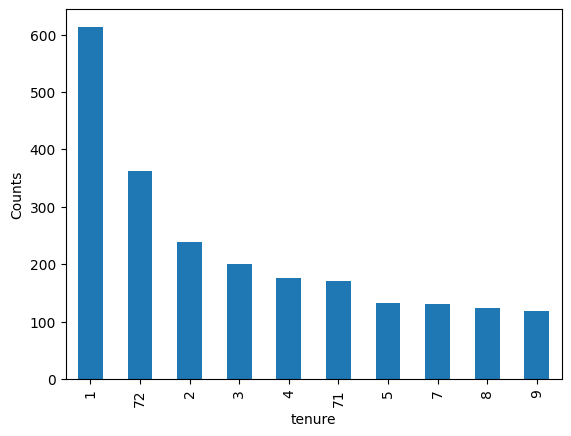

In [168]:
import matplotlib.pyplot as plt

df['tenure'].value_counts()[:10].plot.bar()
plt.xlabel('tenure')
plt.ylabel('Counts')

Text(0, 0.5, 'Frequency')

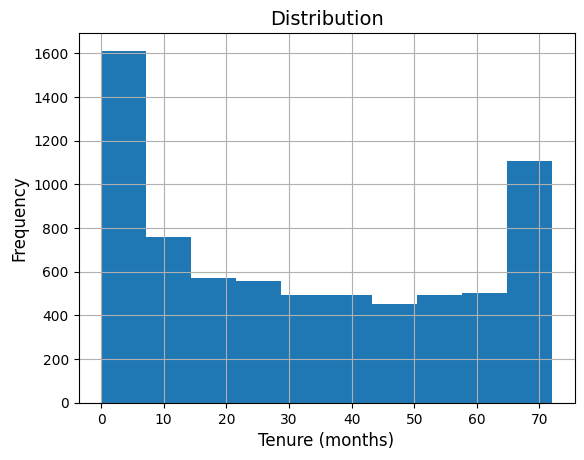

In [170]:
df['tenure'].hist()
plt.title('Distribution', fontsize=14)
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

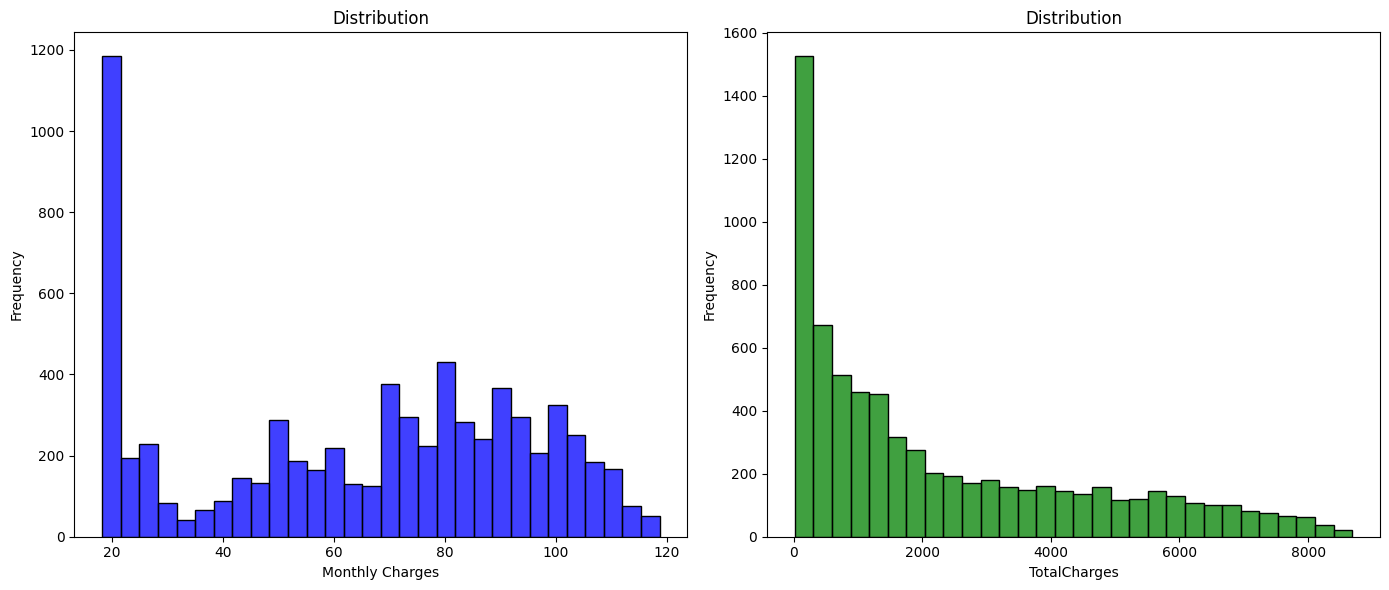

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['MonthlyCharges'], bins=30, kde=False, ax=ax[0], color='blue')
ax[0].set_title('Distribution')
ax[0].set_xlabel('Monthly Charges')
ax[0].set_ylabel('Frequency')

sns.histplot(df['TotalCharges'], bins=30, kde=False, ax=ax[1], color='green')
ax[1].set_title('Distribution')
ax[1].set_xlabel('TotalCharges')
ax[1].set_ylabel('Frequency')


plt.tight_layout()

plt.show()

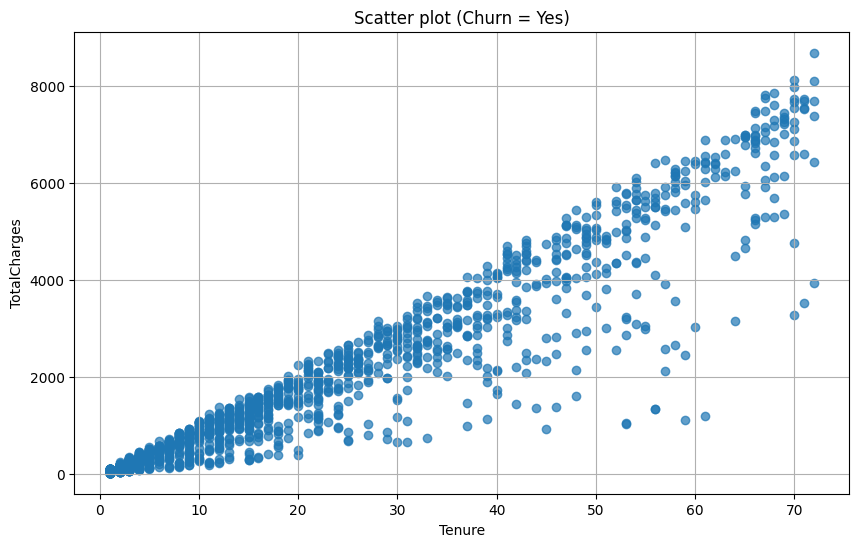

In [174]:
plt.figure(figsize=(10, 6))
plt.scatter(df_churn_yes['tenure'], df_churn_yes['TotalCharges'], alpha=0.7)
plt.title('Scatter plot (Churn = Yes)')
plt.xlabel('Tenure')
plt.ylabel('TotalCharges')
plt.grid(True)
plt.show()

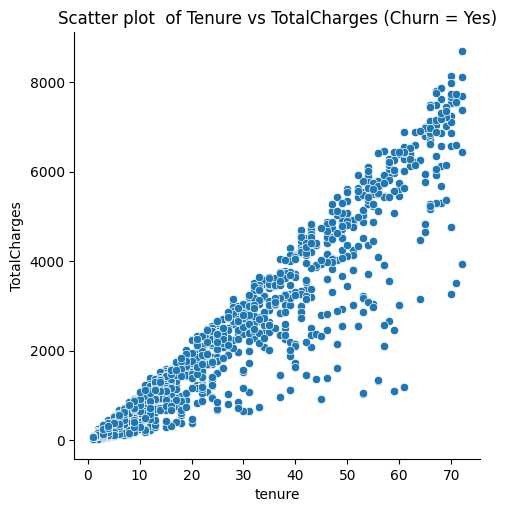

In [173]:
sns.relplot(data=df_churn_yes, x='tenure', y='TotalCharges', kind='scatter')
plt.title('Scatter plot  of Tenure vs TotalCharges (Churn = Yes)')
plt.show()

<Axes: xlabel='Contract', ylabel='TotalCharges'>

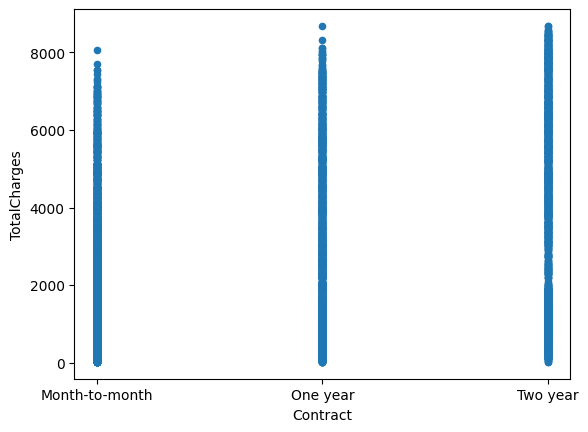

In [137]:
df.plot.scatter(x='Contract', y='TotalCharges')

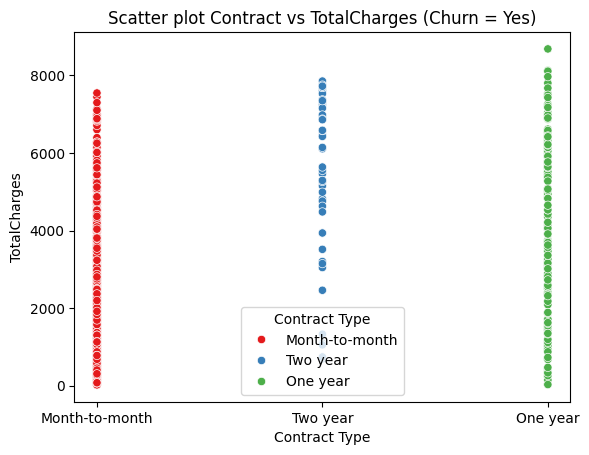

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_churn_yes, x='Contract', y='TotalCharges', hue='Contract', palette='Set1')
plt.title('Scatter plot Contract vs TotalCharges (Churn = Yes)')
plt.xlabel('Contract Type')
plt.ylabel('TotalCharges')
plt.legend(title='Contract Type')
plt.show()

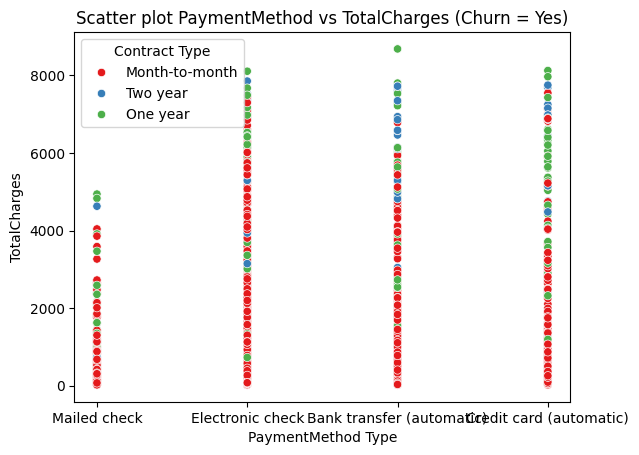

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_churn_yes, x='PaymentMethod', y='TotalCharges', hue='Contract', palette='Set1')
plt.title('Scatter plot PaymentMethod vs TotalCharges (Churn = Yes)')
plt.xlabel('PaymentMethod Type')
plt.ylabel('TotalCharges')
plt.legend(title='Contract Type')
plt.show()

<Axes: >

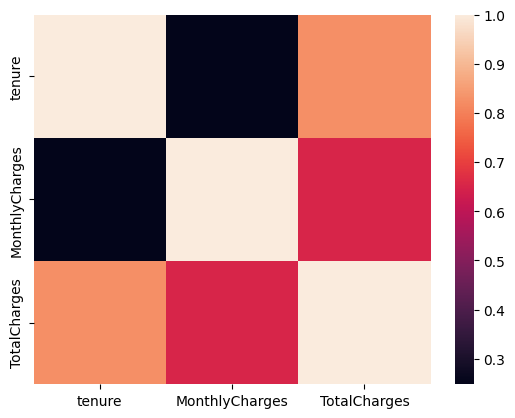

In [114]:
sns.heatmap(df.corr(numeric_only=True))

## Conclusion

In this project, I applied essential data cleaning techniques to prepare the dataset for analysis. This included removing incomplete rows and handling invalid sensor readings by replacing them with NaN.

To address missing values, I used two strategies:

- Dropping rows when missing data was minimal and unlikely to affect the results.

- Median imputation to preserve important information and reduce data loss.

These decisions balanced data quality with data retention, ensuring that the dataset remained reliable for subsequent analyses. This process highlighted how careful data cleaning directly impacts the accuracy and interpretability of insights derived from the data.


Maryi Tatiana Palacios Giraldo